# Introduction
- This notebook is intended to explore and clean the dataset of listed COMAH sites in the UK, in preparation for cluster analysis.<br>
- The dataset is a CSV file of all UK COMAH sites, including the company name and address, as of Jan 2021.<br>
- The dataset was aquired through the HSE: http://www.hse.gov.uk/comah/comah-establishments.htm

# Read in raw data
- First we import the modules required for this analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

- Here we create a custom 'describe' function to give a summary of our dataframe

In [2]:
def top_value_counts(x,top_n=5):
    v_cs = list((100*round(x.value_counts(normalize=True),2)).apply(int))
    l = len(v_cs)
    v_cs = list(map(str,v_cs))
    v_cs = ','.join(v_cs) if l<=top_n else ','.join(v_cs[:top_n]+['..'])
    return v_cs

def custom_dsc(df,samples=1):
    df_dsc = pd.DataFrame(data=[],index=df.columns)
    for col in df.columns:
        df_dsc.loc[col,'hasnas'] = df[col].hasnans
        df_dsc.loc[col,'dtype'] = df[col].dtypes
        df_dsc.loc[col,'count'] = df[col].count()
        df_dsc.loc[col,'nans'] = df[col].isna().sum()
        df_dsc.loc[col,'nunique_%']=round(df[col].nunique()/df[col].count(),2)
        df_dsc.loc[col,'nunique']=df[col].nunique()
        
        df_dsc.loc[col,'top val cs'] = top_value_counts(df[col])
            
        for n in range(samples):
            df_dsc.loc[col,'sample'+str(n+1)]=df[col].dropna().sample(n=1).values
    print("Shape:",df.shape)
    return df_dsc.convert_dtypes()

- Read in first csv file

In [3]:
df = pd.read_csv('COMAH UPPER and LOWER Tier Establishment List @ March 2020.csv')

- We display information about each of the columns

In [4]:
custom_dsc(df,4)

Shape: (871, 13)


,hasnas,dtype,count,nans,nunique_%,nunique,top val cs,sample1,sample2,sample3,sample4
Operator Name,False,object,871,0,0.58,506,"3,3,2,2,1,..",[Flogas Britain Limited],[Covance CRS Limited],[Essar Oil (UK) Limited],[Puma Energy (UK) Limited]
Location Name,False,object,871,0,0.84,730,"1,1,1,1,1,..",Cibyn Industrial Estate,Irvine,Holford Brine Field,Lochaber Smelter
Address Name,True,object,565,306,0.96,541,"1,1,1,1,0,..",Alexandra Dock,Springfields,Rectors Lane,Iotech House
Address Street,True,object,741,130,0.9,668,"1,1,1,1,1,..",Llanberis Road,Stoneness Road,PO Box 3,Adam Smith Street
Address Town,True,object,869,2,0.57,496,"2,2,2,2,1,..",Birmingham,London,Bridgwater,TAIN
Address County,False,object,871,0,0.22,194,"5,3,3,2,2,..",City of Glasgow,City of Glasgow,Cheshire,West Glamorgan
Address Postcode 1,True,object,870,1,0.64,561,"2,1,1,1,1,..",WS9,PL4,WA5,WA11
Address Postcode 2,True,object,870,1,0.82,717,"1,1,1,0,0,..",3NX,2WZ,7BQ,2QX
Incumbent Duty Type Text,False,object,871,0,0.0,3,"59,41,0",COMAH Lower Tier Operator,COMAH Upper Tier Operator,COMAH Upper Tier Operator,COMAH Lower Tier Operator
Previous Name,True,object,310,561,0.63,196,"6,4,3,3,2,..",(was Oil and Pipelines Agency),(was Shell UK Oil Products Limited),(was Oil and Pipelines Agency),(was Flogas UK Limited)


- We display the top 5 rows

In [5]:
df.head()

,Operator Name,Location Name,Address Name,Address Street,Address Town,Address County,Address Postcode 1,Address Postcode 2,Incumbent Duty Type Text,Previous Name,LA Code,Local Authority,Country
0,Anglian Water Services Limited,Wing Water Treatment Works,NaN,Morcott Road,Oakham,Rutland,LE15,8SA,COMAH Upper Tier Operator,NaN,2470.0,Rutland UA,England
1,Arch Timber Protection Limited,Huddersfield,Huddersfield Works,Leeds Road,Huddersfield,West Yorkshire,HD2,1YU,COMAH Upper Tier Operator,(was Arch UK Biocides Ltd),4715.0,Kirklees,England
2,Argenta Dundee Limited,Dundee,Dunsinane Industrial Estate,Kinnoull Road,Dundee,Angus,DD2,3XR,COMAH Upper Tier Operator,(was Vericore Limited),9059.0,Dundee UA,Scotland
3,Associated British Ports,Immingham Dock,Immingham Dock,NaN,Immingham,Lincolnshire,DN40,2NS,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England
4,Associated Petroleum Terminals (Immingham) Lim...,Immingham,Main Terminal,Queens Road,Immingham,North East Lincolnshire,DN40,2PN,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England


- We now bring in the longitude - latitude data for UK postcodes

In [6]:
df_pc = pd.read_csv('ukpostcodes.csv')

- We display information about each of the columns

In [7]:
custom_dsc(df_pc,5)

Shape: (1766510, 4)


,hasnas,dtype,count,nans,nunique_%,nunique,top val cs,sample1,sample2,sample3,sample4,sample5
id,False,int64,1766510,0,1.0,1766510,"0,0,0,0,0,..",1214216.0,803911.0,630667.0,1088502.0,1430607.0
postcode,False,object,1766510,0,1.0,1766510,"0,0,0,0,0,..",IM2 3HF,PO12 4JW,SK8 3AH,EH3 6SZ,HP1 2AL
latitude,True,float64,1766428,82,0.95,1681044,"1,0,0,0,0,..",53.798241,52.495531,51.243246,54.41109,53.393943
longitude,True,float64,1766428,82,0.95,1681360,"1,0,0,0,0,..",-0.639758,-3.02969,-1.450332,-1.73443,-0.409796


- We drop the ID column and remove rows with no longitude or latitude

In [8]:
df_pc = df_pc.drop(columns=['id']).dropna()

- We display the top 5 rows

In [9]:
df_pc.head()

,postcode,latitude,longitude
0,AB10 1XG,57.144165,-2.114848
1,AB10 6RN,57.137880,-2.121487
2,AB10 7JB,57.124274,-2.127190
3,AB11 5QN,57.142701,-2.093295
4,AB11 6UL,57.137547,-2.112233


# Basic exploration

When performing inital EDA, we are interested in:
- Possible errors/mistakes in the data
- Checking our assumptions
- Preliminary model selection
- Relationships between explanatory variables
- Rough relationships between explanatory and response variables
    
__Data set 1__
- Comprises solely of categorical data. The summary table above is sufficient for this project.

__Data set 2__
- Comprises of numerial interval data, other than searching for missing values here we are comfortable to progress this data set without any further EDA

- We define a function to allow us to generate graphs for specific columns of interest in dataset 1

In [10]:
def show_col_count_by_quant(df,col,quant=1,ax=None,title_append=None):
    if ax == None: fig,ax=plt.subplots(figsize=(16,6))
    # generate graph
    df_res = pd.concat([df[[col]].value_counts(),
                        df[[col]].value_counts(normalize=True)],axis=1).reset_index().rename(columns={0:'freq',1:'pct'}).set_index(col)
    df_res[df_res['pct'].cumsum()<=quant]['freq'].sort_values(ascending=True).plot(kind='barh',ax=ax)
    # create title and labels
    quant = 'top '+str(int(100*quant))+'%' if quant < 1 else 'all values'
    title = '"{}" count, {}'.format(col,quant)
    title = title_append+': '+title if title_append != None else title
    ax.set_title(title)
    ax.set_xlabel('count')

- Show counts for specific columns of interest

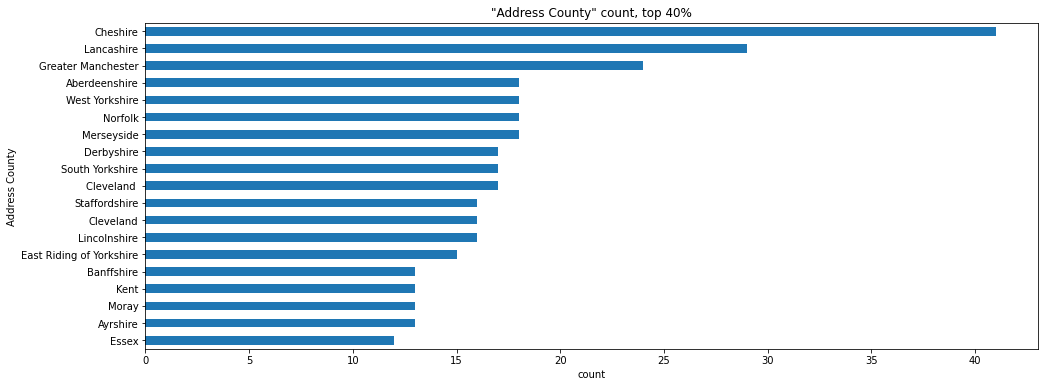

In [11]:
show_col_count_by_quant(df,'Address County',quant=0.4)

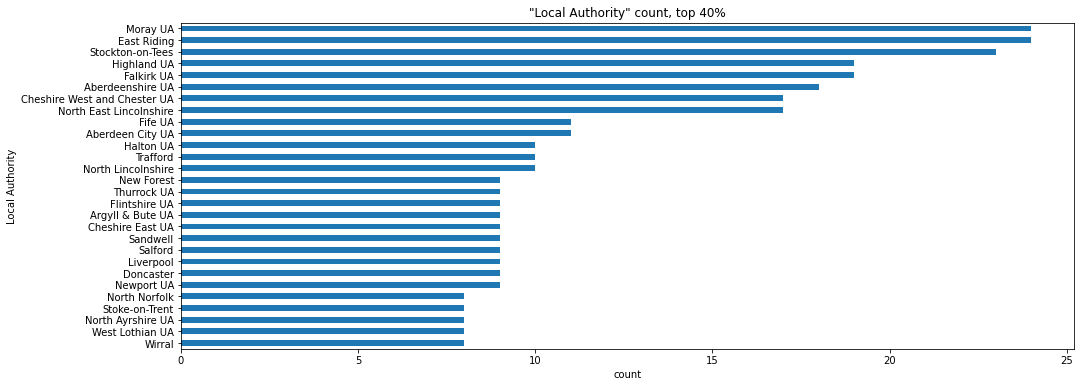

In [12]:
show_col_count_by_quant(df,'Local Authority',quant=0.4)

- Show the local authorities for the County's with the highest counts

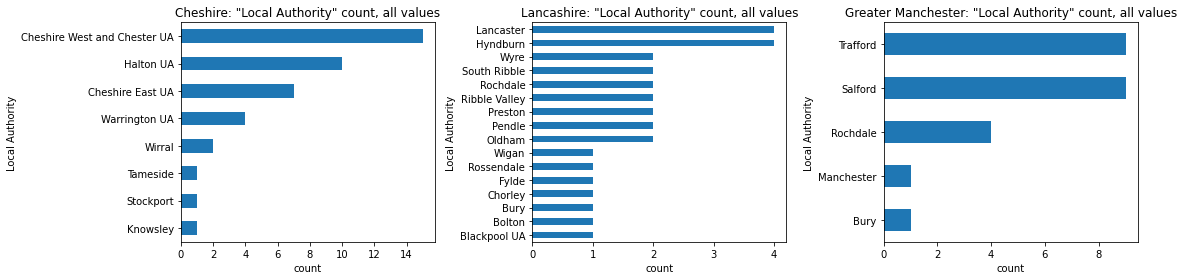

In [13]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
for n,county in enumerate(['Cheshire','Lancashire','Greater Manchester']):
    show_col_count_by_quant(df[df['Address County']==county],'Local Authority',ax=ax[n],title_append = county)
plt.tight_layout()

- Show Operator Names for specific sites in 'Cheshire West and Chester UA'

In [14]:
res = df.groupby(['Incumbent Duty Type Text','Address Town']).apply(lambda g: g[g['Local Authority']=='Cheshire West and Chester UA'][['Operator Name']].reset_index(drop=True))
res = res.unstack(level=0).fillna('').droplevel(axis=1,level=0)
res.columns.name = None
res

COMAH Lower Tier Operator  \
Address Town                                               
Ellesmere Port     0      Argent Energy Holdings Limited   
                   1           Stanlow Terminals Limited   
Little Stanney     0           Air Products (BR) Limited   
Tarvin             0  Oakmere Technical Services Limited   
Chester            0                                       
                   1                                       
                   2                                       
Holford, Northwich 0                                       
Middlewich         0                                       
Northwich          0                                       
                   1                                       
Northwich          0                                       
Plumley, Knutsford 0                                       
South Wirral       0                                       
Winsford           0                                       

                                 COMAH Upper Tier Operator  
Address Town                                                
Ellesmere Port     0                Essar Oil (UK) Limited  
                   1                      Innospec Limited  
Little Stanney     0                                        
Tarvin             0                                        
Chester            0             CF Fertilisers UK Limited  
                   1  CLH Pipeline System (CLH-PS) Limited  
                   2             Urenco ChemPlants Limited  
Holford, Northwich 0                    Cadent Gas Limited  
Middlewich         0                    H W Coates Limited  
Northwich          0           Holford Gas Storage Limited  
                   1        Thor Specialities (UK) Limited  
Northwich          0           Nalco Manufacturing Limited  
Plumley, Knutsford 0              Oil and Pipelines Agency  
South Wirral       0                Veolia ES (UK) Limited  
Winsford           0    Warehouse One Distribution Limited

# Join data

- We must join the data sets togerther with the aim of assigning latitude and longitude values to our addresses
- First we create a 'postcode column' and remove whitespace on both df's

In [15]:
df['postcode'] = df['Address Postcode 1']+df['Address Postcode 2']
df['postcode'] = df['postcode'].str.replace(" ","")
df = df.drop(columns=['Address Postcode 1','Address Postcode 2'])

df_pc['postcode'] = df_pc['postcode'].str.replace(" ","")

df = pd.merge(df,df_pc,how='left',on='postcode')

In [16]:
df.head()

,Operator Name,Location Name,Address Name,Address Street,Address Town,Address County,Incumbent Duty Type Text,Previous Name,LA Code,Local Authority,Country,postcode,latitude,longitude
0,Anglian Water Services Limited,Wing Water Treatment Works,NaN,Morcott Road,Oakham,Rutland,COMAH Upper Tier Operator,NaN,2470.0,Rutland UA,England,LE158SA,52.616952,-0.679148
1,Arch Timber Protection Limited,Huddersfield,Huddersfield Works,Leeds Road,Huddersfield,West Yorkshire,COMAH Upper Tier Operator,(was Arch UK Biocides Ltd),4715.0,Kirklees,England,HD21YU,53.662959,-1.755167
2,Argenta Dundee Limited,Dundee,Dunsinane Industrial Estate,Kinnoull Road,Dundee,Angus,COMAH Upper Tier Operator,(was Vericore Limited),9059.0,Dundee UA,Scotland,DD23XR,56.481057,-3.009501
3,Associated British Ports,Immingham Dock,Immingham Dock,NaN,Immingham,Lincolnshire,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England,DN402NS,NaN,NaN
4,Associated Petroleum Terminals (Immingham) Lim...,Immingham,Main Terminal,Queens Road,Immingham,North East Lincolnshire,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England,DN402PN,53.622203,-0.174614


- Show number of sites without Latitude Longitude (no match on postcode)

In [17]:
df[df[['latitude','longitude']].isna().any(axis=1)].shape[0]

71

In [18]:
df_r = df.dropna(subset=['latitude','longitude']).drop(columns=['Address Name','Address Street','Address Town','Address County','Previous Name','LA Code'])

df_r = df_r.rename(columns={'Incumbent Duty Type Text':'COMAH tier'})
df_r.loc[df_r['COMAH tier'].str.lower().str.contains('lower'),'COMAH tier'] = 'lower'
df_r.loc[df_r['COMAH tier'].str.lower().str.contains('upper'),'COMAH tier'] = 'upper'

In [19]:
df_r.head()

,Operator Name,Location Name,COMAH tier,Local Authority,Country,postcode,latitude,longitude
0,Anglian Water Services Limited,Wing Water Treatment Works,upper,Rutland UA,England,LE158SA,52.616952,-0.679148
1,Arch Timber Protection Limited,Huddersfield,upper,Kirklees,England,HD21YU,53.662959,-1.755167
2,Argenta Dundee Limited,Dundee,upper,Dundee UA,Scotland,DD23XR,56.481057,-3.009501
4,Associated Petroleum Terminals (Immingham) Lim...,Immingham,upper,North East Lincolnshire,England,DN402PN,53.622203,-0.174614
5,Avanti Gas Limited,Ellesmere Port,upper,Wirral,England,CH654HB,53.286351,-2.912845


# Convert long,lat into x,y co-ordinates

In [20]:
def longlat_to_xy(s):
    R = 6371 #Earth radius in km
    x = R*math.cos((math.pi/180)*s['latitude'])*math.cos((math.pi/180)*s['longitude'])
    y = R*math.cos((math.pi/180)*s['latitude'])*math.sin((math.pi/180)*s['longitude'])
    return pd.Series([x,y],index=['x','y'])

In [21]:
df_r[['x','y']] = df_r.apply(longlat_to_xy,axis=1)

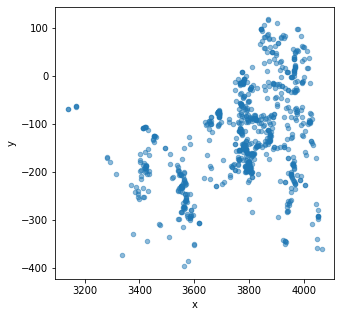

In [22]:
ax = df_r[['x','y']].plot(kind='scatter',x='x',y='y',figsize=(5,5),alpha=0.5)

# Rotate  x,y co-ordinates

In [23]:
def rotate_xy(s,theta):
    x,y = s['x'],s['y']
    x_n = x*math.cos((math.pi/180)*theta) - y*math.sin((math.pi/180)*theta)
    y_n = y*math.cos((math.pi/180)*theta) + x*math.sin((math.pi/180)*theta)
    return pd.Series([x_n,y_n],index=['x','y'])

In [24]:
df_r[['x','y']] = df_r.apply(rotate_xy,theta=-90,axis=1)

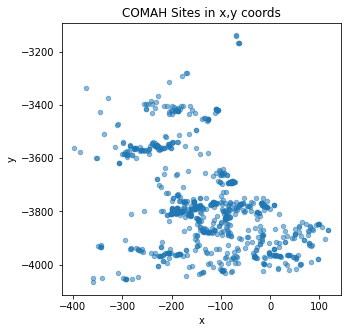

In [25]:
ax = df_r.plot(kind='scatter',x='x',y='y',figsize=(5,5),alpha=0.5,title='COMAH Sites in x,y coords')

# Re-scale

In [26]:
df_r['x'] = df_r['x']-df_r['x'].min()
df_r['y'] = df_r['y']-df_r['y'].min()
x_size = 5
y_size = x_size * df_r['y'].max()/df_r['x'].max()

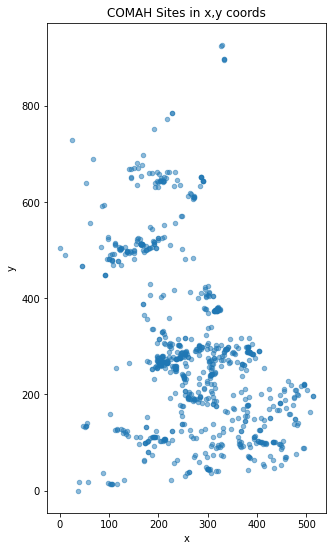

In [27]:
ax = df_r.plot(kind='scatter',x='x',y='y',figsize=(x_size,y_size),alpha=0.5,title='COMAH Sites in x,y coords')

# Show final result and export

In [28]:
df_r = df_r.reset_index(drop=True)
df_r.head()

,Operator Name,Location Name,COMAH tier,Local Authority,Country,postcode,latitude,longitude,x,y
0,Anglian Water Services Limited,Wing Water Treatment Works,upper,Rutland UA,England,LE158SA,52.616952,-0.679148,351.142227,198.519866
1,Arch Timber Protection Limited,Huddersfield,upper,Kirklees,England,HD21YU,53.662959,-1.755167,281.366873,293.078475
2,Argenta Dundee Limited,Dundee,upper,Dundee UA,Scotland,DD23XR,56.481057,-3.009501,212.282916,553.047258
3,Associated Petroleum Terminals (Immingham) Lim...,Immingham,upper,North East Lincolnshire,England,DN402PN,53.622203,-0.174614,385.475223,287.675256
4,Avanti Gas Limited,Ellesmere Port,upper,Wirral,England,CH654HB,53.286351,-2.912845,203.445680,262.576329


In [29]:
df_r.to_csv('comah_sites_clean.csv')